In [8]:
from data.dataloader import train_data,review_data

In [9]:
train_data.head(10)

,overall,reviewText,sentiment
144283,2.0,To large and the bill is very long.,negative
27564,5.0,Love these pants- totally not see through so p...,positive
263523,3.0,They should have in between sizes.,neutral
139313,1.0,I have to replace this wallet after less than ...,negative
235812,3.0,Fit all wrong,neutral
213558,3.0,"I really like the shirt, unfortunately it's wa...",neutral
199956,3.0,Having problems with the top zipper catching o...,neutral
111181,1.0,Made very cheap even though it was 57 dollars,negative
245266,3.0,Not in good quality,neutral
240537,3.0,"Non polarized version : Nice color , fits the ...",neutral


In [13]:
review_data.drop('sentiment', axis=1).head(10)

,overall,reviewText
0,5.0,Exactly what I needed.
1,2.0,"I agree with the other review, the opening is ..."
2,4.0,Love these... I am going to order another pack...
3,2.0,too tiny an opening
4,3.0,Okay
5,5.0,Exactly what I wanted.
6,4.0,These little plastic backs work great. No mor...
7,3.0,mother - in - law wanted it as a present for h...
8,3.0,"Item is of good quality. Looks great, too. But..."
9,3.0,I had used my last el-cheapo fake leather ciga...


In [14]:
review_data.to_csv('reviewdata.csv', index=False)

In [16]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 653.6 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


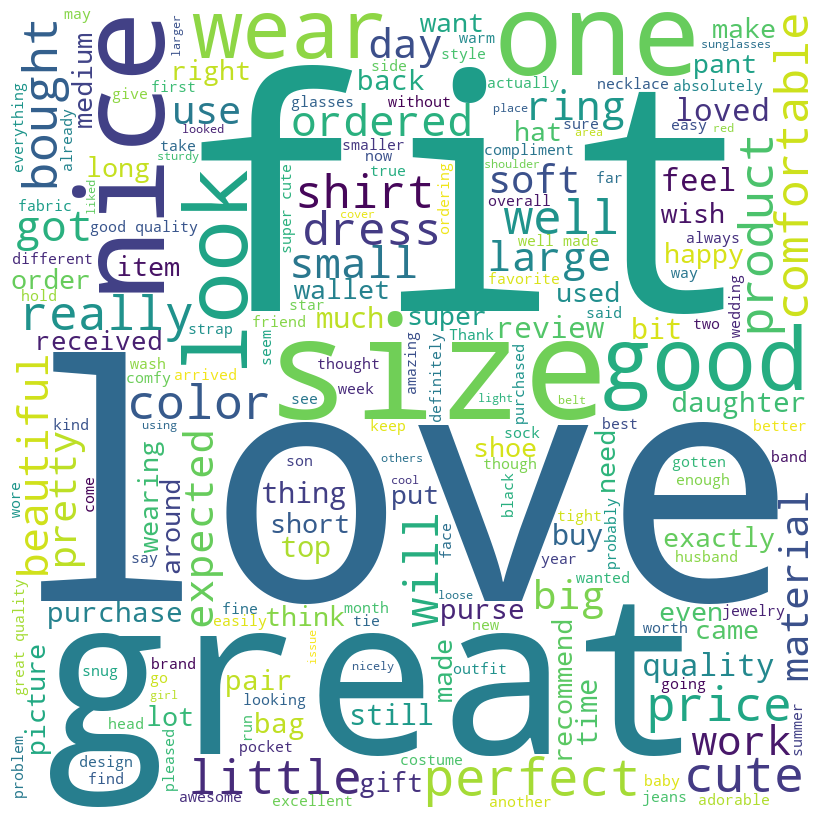

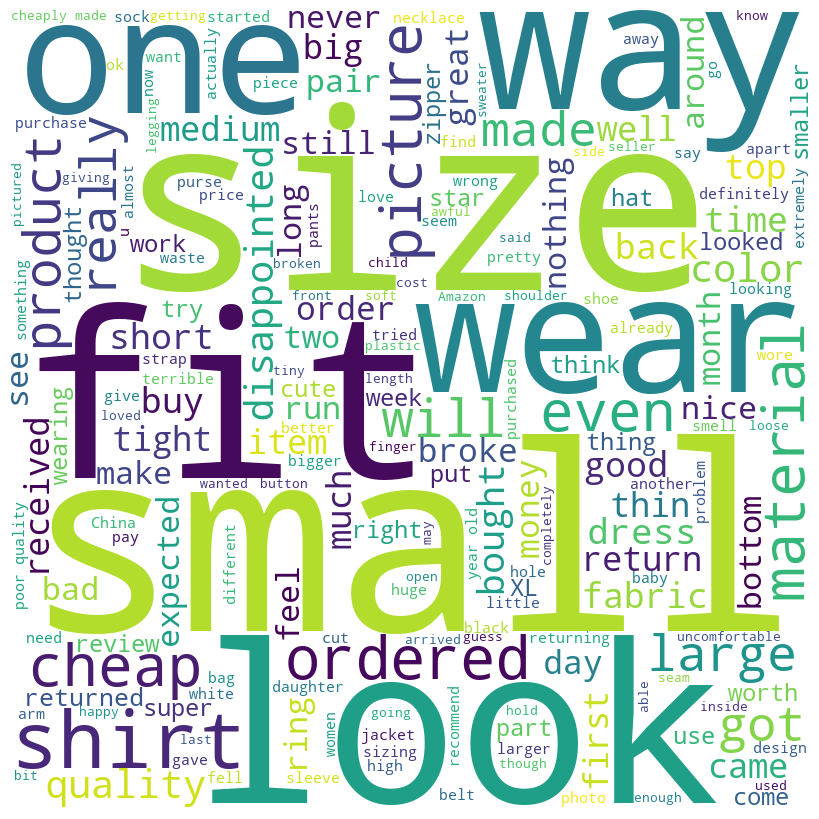

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sampling 1000 positive and 1000 negative reviews
positive_reviews = review_data[review_data['sentiment'] == 'positive'].sample(n=1000, random_state=1)['reviewText']
negative_reviews = review_data[review_data['sentiment'] == 'negative'].sample(n=1000, random_state=1)['reviewText']

# Combining the text data
positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)

# Generating word clouds
wordcloud_positive = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(positive_text)

wordcloud_negative = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(negative_text)

# Plotting the Positive WordCloud                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_positive) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('positive_wordcloud.png')

# Plotting the Negative WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_negative) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('negative_wordcloud.png')